# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
# !pip install rasterio
# !pip install tensorflow_addons
# !pip install datasets
# !pip install transformers
#!pip install tensorflow
#!pip install protobuf==3.20.*
import tensorflow as tf
import rasterio as rio
import pandas as pd
from rasterio.plot import show
from sklearn import cluster
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.layers import Input, Dense,Flatten #1 DIM
import numpy as np
from keras.layers import Conv2D, BatchNormalization,Activation #IMAGES ARE 2 DIM
from keras.models import Model
import matplotlib.pyplot as plt
import glob
import re
from skimage.io import imread, imshow
import tifffile as tiff
import cv2
import scipy.io
from itertools import chain
import pickle
import os
from osgeo import gdal
from keras.preprocessing import image
from tqdm import tqdm
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.layers.core import Dense,Flatten
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
import imageio
from rasterio.plot import show
from sklearn import cluster
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import datasets
from transformers import ViTFeatureExtractor
from huggingface_hub import HfFolder
from transformers import TFViTModel
from transformers import TFViTForImageClassification, create_optimizer
from transformers import DefaultDataCollator
from transformers.keras_callbacks import PushToHubCallback
from tensorflow.keras.callbacks import TensorBoard as TensorboardCallback, EarlyStopping
import glob
import gdal
import tensorflow as tf
from PIL import Image
from keras.preprocessing import image
import numpy

In [2]:
#!pip install opencv-python
#!pip install osgeo

In [3]:
df=pd.read_csv('Label_CSV_All_Municipality.csv')
df

,Unnamed: 0,epiweek,Cases,Municipality code,Municipality,cases_differences,cases_intensity,cases_diff_abs,Stability Label,final_cases_label
0,0,2016/w01,235,5001,Medellín,0,No Change,0,Stable,Stable
1,1,2016/w02,274,5001,Medellín,39,Increased,39,Unstable,Increased
2,2,2016/w03,252,5001,Medellín,-22,Decreased,22,Unstable,Decreased
3,3,2016/w04,262,5001,Medellín,10,Increased,10,Stable,Stable
4,4,2016/w05,274,5001,Medellín,12,Increased,12,Stable,Stable
...,...,...,...,...,...,...,...,...,...,...
160519,160519,2018/w48,0,99773,Cumaribo,0,No Change,0,Stable,Stable
160520,160520,2018/w49,0,99773,Cumaribo,0,No Change,0,Stable,Stable
160521,160521,2018/w50,0,99773,Cumaribo,0,No Change,0,Stable,Stable
160522,160522,2018/w51,0,99773,Cumaribo,0,No Change,0,Stable,Stable


In [4]:
#print([name for name in os.listdir("/data0") if os.path.isdir(name)])

In [5]:
folders=[]
folders = [f for f in sorted(os.listdir('Dataset_10_best_cities'))]
folders
folders.pop(0)
folders

['23001',
 '41001',
 '50001',
 '5001',
 '5360',
 '54001',
 '68001',
 '73001',
 '76001',
 '8001']

# Creating the JPG images in the respective folders

In [57]:
for k in range(len(folders)):
    list1=[]
    for filepath in glob.iglob('Dataset_10_best_cities/'+folders[k]+'/*.tiff'):
        list1.append(filepath)
    #print(len(list1))
    string=list1[0]
    val=len(str(folders[k]))
    #print(val)
    #print(string[0:41+val])
    for i in range(0,len(list1)):
        options_list = [
            '-ot Byte',
            '-of JPEG',
            '-b 1',
            '-scale'
        ]           
        options_string = " ".join(options_list)
        
        string=list1[i]
        
        gdal.Translate(
            string[0:41+val]+'jpg',
            string,
            options=options_string
        ) 

# Reading the CSV with data for all municipalities

In [6]:
folders=[]
folders = [f for f in sorted(os.listdir('Dataset_10_best_cities'))]
folders
folders.pop(0)
folders

['23001',
 '41001',
 '50001',
 '5001',
 '5360',
 '54001',
 '68001',
 '73001',
 '76001',
 '8001']

# Adding a new column for TIFF images

In [7]:
df=pd.read_csv('Label_CSV_All_Municipality.csv')
df
df["TIFF Image Name"]=np.NaN
df

,Unnamed: 0,epiweek,Cases,Municipality code,Municipality,cases_differences,cases_intensity,cases_diff_abs,Stability Label,final_cases_label,TIFF Image Name
0,0,2016/w01,235,5001,Medellín,0,No Change,0,Stable,Stable,NaN
1,1,2016/w02,274,5001,Medellín,39,Increased,39,Unstable,Increased,NaN
2,2,2016/w03,252,5001,Medellín,-22,Decreased,22,Unstable,Decreased,NaN
3,3,2016/w04,262,5001,Medellín,10,Increased,10,Stable,Stable,NaN
4,4,2016/w05,274,5001,Medellín,12,Increased,12,Stable,Stable,NaN
...,...,...,...,...,...,...,...,...,...,...,...
160519,160519,2018/w48,0,99773,Cumaribo,0,No Change,0,Stable,Stable,NaN
160520,160520,2018/w49,0,99773,Cumaribo,0,No Change,0,Stable,Stable,NaN
160521,160521,2018/w50,0,99773,Cumaribo,0,No Change,0,Stable,Stable,NaN
160522,160522,2018/w51,0,99773,Cumaribo,0,No Change,0,Stable,Stable,NaN


# Adding Tiff images' name in the column

In [8]:
for k in range(len(folders)):
    list1=[]
    for filepath in glob.iglob('Dataset_10_best_cities/'+folders[k]+'/*.tiff'):
        list1.append(filepath)
    list2=sorted(list1)
    #print(list2)
    df_image_name = pd.DataFrame(list2) 
    df_image_name[0] = df_image_name[0].str.replace('Dataset_10_best_cities/'+folders[k]+'/', '')
    list_image=[]
    list_image=df_image_name[0].tolist()
    #print(list_image)
    #print(folders[k])
    #print(list_image)
    #print(list_image[0])
    for i in range(160524):
        if str(df.iat[i,3])==folders[k]:
            for j in range(len(list_image)):
                df.iloc[i+j,10]=list_image[j]
            break

            
df.tail(101000)
dff=df.dropna()
dff
dff = dff.drop('Unnamed: 0', 1)
dff=dff.reset_index()
dff=dff.drop('index',1)
dff

/tmp/ipykernel_118756/3898210675.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dff = dff.drop('Unnamed: 0', 1)
/tmp/ipykernel_118756/3898210675.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dff=dff.drop('index',1)


,epiweek,Cases,Municipality code,Municipality,cases_differences,cases_intensity,cases_diff_abs,Stability Label,final_cases_label,TIFF Image Name
0,2016/w01,235,5001,Medellín,0,No Change,0,Stable,Stable,image_2016-01-03.tiff
1,2016/w02,274,5001,Medellín,39,Increased,39,Unstable,Increased,image_2016-01-10.tiff
2,2016/w03,252,5001,Medellín,-22,Decreased,22,Unstable,Decreased,image_2016-01-17.tiff
3,2016/w04,262,5001,Medellín,10,Increased,10,Stable,Stable,image_2016-01-24.tiff
4,2016/w05,274,5001,Medellín,12,Increased,12,Stable,Stable,image_2016-01-31.tiff
...,...,...,...,...,...,...,...,...,...,...
1555,2018/w48,25,76001,Cali,2,Increased,2,Stable,Stable,image_2018-11-25.tiff
1556,2018/w49,21,76001,Cali,-4,Decreased,4,Stable,Stable,image_2018-12-02.tiff
1557,2018/w50,36,76001,Cali,15,Increased,15,Stable,Stable,image_2018-12-09.tiff
1558,2018/w51,20,76001,Cali,-16,Decreased,16,Stable,Stable,image_2018-12-16.tiff


# Creating numeric labels for the images

In [9]:
#dff.reset_index()
merged_df=dff
list_numlabel=[]
for i in range(0,dff.shape[0]):
    if (merged_df.iat[i,8]=='Stable'):
        list_numlabel.append('1')
    elif(merged_df.iat[i,8]=='Increased'):
        list_numlabel.append('2')
    elif(merged_df.iat[i,8]=='Decreased'):
        list_numlabel.append('3')
#list_numlabel

df_numeric_label = pd.DataFrame(list_numlabel)
df_numeric_label

merged_df= pd.concat([merged_df, df_numeric_label],axis=1)
merged_df.columns = ['epiweek','Cases','Municipality code','Municipality','cases_differences','cases_intensity','cases_diff_abs','Stability Label','final_cases_label','TIFF Image Name','Numeric Label']
merged_df

list_stable_column=[]
list_increased_column =[]
list_decreased_column = []
for i in range(0,dff.shape[0]):
    if (merged_df.iat[i,8]=='Stable'):
        list_stable_column.append('1')
        list_increased_column.append('0')
        list_decreased_column.append('0')
    elif(merged_df.iat[i,8]=='Increased'):
        list_stable_column.append('0')
        list_increased_column.append('1')
        list_decreased_column.append('0')
    elif(merged_df.iat[i,8]=='Decreased'):
        list_stable_column.append('0')
        list_increased_column.append('0')
        list_decreased_column.append('1')


df_stable_column = pd.DataFrame(list_stable_column)
df_increased_column = pd.DataFrame(list_increased_column)
df_decreased_column = pd.DataFrame(list_decreased_column)

merged_df= pd.concat([merged_df, df_stable_column,df_increased_column,df_decreased_column],axis=1)
merged_df.columns = ['epiweek','Cases','Municipality code','Municipality','cases_differences','cases_intensity','cases_diff_abs','Stability Label','final_cases_label','TIFF Image Name','Numeric Label','Stable','Increased','Decreased']
merged_df #we get one-hot encoded column for the labels

,epiweek,Cases,Municipality code,Municipality,cases_differences,cases_intensity,cases_diff_abs,Stability Label,final_cases_label,TIFF Image Name,Numeric Label,Stable,Increased,Decreased
0,2016/w01,235,5001,Medellín,0,No Change,0,Stable,Stable,image_2016-01-03.tiff,1,1,0,0
1,2016/w02,274,5001,Medellín,39,Increased,39,Unstable,Increased,image_2016-01-10.tiff,2,0,1,0
2,2016/w03,252,5001,Medellín,-22,Decreased,22,Unstable,Decreased,image_2016-01-17.tiff,3,0,0,1
3,2016/w04,262,5001,Medellín,10,Increased,10,Stable,Stable,image_2016-01-24.tiff,1,1,0,0
4,2016/w05,274,5001,Medellín,12,Increased,12,Stable,Stable,image_2016-01-31.tiff,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,2018/w48,25,76001,Cali,2,Increased,2,Stable,Stable,image_2018-11-25.tiff,1,1,0,0
1556,2018/w49,21,76001,Cali,-4,Decreased,4,Stable,Stable,image_2018-12-02.tiff,1,1,0,0
1557,2018/w50,36,76001,Cali,15,Increased,15,Stable,Stable,image_2018-12-09.tiff,1,1,0,0
1558,2018/w51,20,76001,Cali,-16,Decreased,16,Stable,Stable,image_2018-12-16.tiff,1,1,0,0


# Adding JPG image name in the dataframe

In [10]:
merged_df["JPG Image Name"]=np.NaN
merged_df


for k in range(len(folders)):
    list1=[]
    for filepath in glob.iglob('Dataset_10_best_cities/'+folders[k]+'/*.jpg'):
        list1.append(filepath)
    #print(list1)
    jpg_image_name=[]
    for i in range(0,len(list1)):
        string=list1[i]
        val=len(str(folders[k]))
        #print(val)
        string=string[24+val:44+val]
        #string=string[136+val:156+val]
        jpg_image_name.append(string)
        #print(string)
    jpg_image_name.sort()
    #print(jpg_image_name[0])
#     #for 
    for j in range(160524):
        if str(merged_df.iat[j,2])==folders[k]:
            for l in range(len(jpg_image_name)):
                merged_df.iloc[j+l,14]=jpg_image_name[l]
            break
    #print(len(jpg_image_name))
       
merged_df

#A_sorted = df.sort_values(["A", "B"], ascending=True)

#merged_df=merged_df.sort_values([])

,epiweek,Cases,Municipality code,Municipality,cases_differences,cases_intensity,cases_diff_abs,Stability Label,final_cases_label,TIFF Image Name,Numeric Label,Stable,Increased,Decreased,JPG Image Name
0,2016/w01,235,5001,Medellín,0,No Change,0,Stable,Stable,image_2016-01-03.tiff,1,1,0,0,image_2016-01-03.jpg
1,2016/w02,274,5001,Medellín,39,Increased,39,Unstable,Increased,image_2016-01-10.tiff,2,0,1,0,image_2016-01-10.jpg
2,2016/w03,252,5001,Medellín,-22,Decreased,22,Unstable,Decreased,image_2016-01-17.tiff,3,0,0,1,image_2016-01-17.jpg
3,2016/w04,262,5001,Medellín,10,Increased,10,Stable,Stable,image_2016-01-24.tiff,1,1,0,0,image_2016-01-24.jpg
4,2016/w05,274,5001,Medellín,12,Increased,12,Stable,Stable,image_2016-01-31.tiff,1,1,0,0,image_2016-01-31.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,2018/w48,25,76001,Cali,2,Increased,2,Stable,Stable,image_2018-11-25.tiff,1,1,0,0,image_2018-11-25.jpg
1556,2018/w49,21,76001,Cali,-4,Decreased,4,Stable,Stable,image_2018-12-02.tiff,1,1,0,0,image_2018-12-02.jpg
1557,2018/w50,36,76001,Cali,15,Increased,15,Stable,Stable,image_2018-12-09.tiff,1,1,0,0,image_2018-12-09.jpg
1558,2018/w51,20,76001,Cali,-16,Decreased,16,Stable,Stable,image_2018-12-16.tiff,1,1,0,0,image_2018-12-16.jpg


# This many images we have for each labels

In [11]:
increased_case=0
decreased_case=0
stable_case=0
for i in range(merged_df.shape[0]):
    if str(merged_df.iat[i,8])=="Increased":
        increased_case=increased_case+1
    if str(merged_df.iat[i,8])=="Decreased":
        decreased_case=decreased_case+1
    if str(merged_df.iat[i,8])=="Stable":
        stable_case=stable_case+1

print("Increased case:", increased_case)
print("Decreased case:", decreased_case)
print("Stable case:", stable_case)

Increased case: 234
Decreased case: 236
Stable case: 1090


# balancing the labels

In [12]:
new_df=pd.DataFrame()
for j in range(0,4):
    for i in range(merged_df.shape[0]):
        if str(merged_df.iat[i,8])=="Increased":
            row=merged_df.loc[[i],:]
            new_df = pd.concat([new_df,row])  # x_new
        if str(merged_df.iat[i,8])=="Decreased":
            row=merged_df.loc[[i],:]
            new_df = pd.concat([new_df,row])  # x_new
new_df

merged_df = pd.concat([merged_df,new_df]).reset_index()
merged_df
merged_df=merged_df.drop(['index'], axis=1)
merged_df


merged_df['Class'] = np.nan
for i in range(merged_df.shape[0]):
    if merged_df.iat[i,10]=='1':
        merged_df.iat[i,15]=0
    if merged_df.iat[i,10]=='2':
        merged_df.iat[i,15]=1
    if merged_df.iat[i,10]=='3':
        merged_df.iat[i,15]=2
merged_df


increased_case=0
decreased_case=0
stable_case=0
for i in range(merged_df.shape[0]):
    if str(merged_df.iat[i,8])=="Increased":
        increased_case=increased_case+1
    if str(merged_df.iat[i,8])=="Decreased":
        decreased_case=decreased_case+1
    if str(merged_df.iat[i,8])=="Stable":
        stable_case=stable_case+1

print("Increased case:", increased_case)
print("Decreased case:", decreased_case)
print("Stable case:", stable_case)
merged_df

Increased case: 1170
Decreased case: 1180
Stable case: 1090


,epiweek,Cases,Municipality code,Municipality,cases_differences,cases_intensity,cases_diff_abs,Stability Label,final_cases_label,TIFF Image Name,Numeric Label,Stable,Increased,Decreased,JPG Image Name,Class
0,2016/w01,235,5001,Medellín,0,No Change,0,Stable,Stable,image_2016-01-03.tiff,1,1,0,0,image_2016-01-03.jpg,0.0
1,2016/w02,274,5001,Medellín,39,Increased,39,Unstable,Increased,image_2016-01-10.tiff,2,0,1,0,image_2016-01-10.jpg,1.0
2,2016/w03,252,5001,Medellín,-22,Decreased,22,Unstable,Decreased,image_2016-01-17.tiff,3,0,0,1,image_2016-01-17.jpg,2.0
3,2016/w04,262,5001,Medellín,10,Increased,10,Stable,Stable,image_2016-01-24.tiff,1,1,0,0,image_2016-01-24.jpg,0.0
4,2016/w05,274,5001,Medellín,12,Increased,12,Stable,Stable,image_2016-01-31.tiff,1,1,0,0,image_2016-01-31.jpg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435,2016/w43,118,76001,Cali,-42,Decreased,42,Unstable,Decreased,image_2016-10-23.tiff,3,0,0,1,image_2016-10-23.jpg,2.0
3436,2016/w48,104,76001,Cali,-46,Decreased,46,Unstable,Decreased,image_2016-11-27.tiff,3,0,0,1,image_2016-11-27.jpg,2.0
3437,2016/w51,112,76001,Cali,-50,Decreased,50,Unstable,Decreased,image_2016-12-18.tiff,3,0,0,1,image_2016-12-18.jpg,2.0
3438,2017/w03,198,76001,Cali,52,Increased,52,Unstable,Increased,image_2017-01-15.tiff,2,0,1,0,image_2017-01-15.jpg,1.0


In [13]:
merged_df.dtypes

epiweek               object
Cases                  int64
Municipality code      int64
Municipality          object
cases_differences      int64
cases_intensity       object
cases_diff_abs         int64
Stability Label       object
final_cases_label     object
TIFF Image Name       object
Numeric Label         object
Stable                object
Increased             object
Decreased             object
JPG Image Name        object
Class                float64
dtype: object

# Making the training and testing set from this

In [14]:
train_image = []
for k in range(len(folders)): 
    string='Dataset_10_best_cities/'+folders[k]+'/'
    for i in tqdm(range(merged_df.shape[0])):
        if str(merged_df.iat[i,2])==folders[k]:
            #img = Image.open(string+merged_df['TIFF Image Name'][i]+'jpg')
            img = tf.keras.utils.load_img(string+merged_df['JPG Image Name'][i],target_size=(745,747,3))
            img=img.resize((225,225))
            img = tf.keras.utils.img_to_array(img)
            #print(img)
            #print(img.shape)

            img = img/255
            #img_flatten=img.flatten()
            #print(img)
            #x=np.expand_dims(img,axis=0)
            #x = preprocess_input(x)
            train_image.append(img)
            #img = image.load_img(string+merged_df['JPG Image Name'][0],target_size=(1205,765,3))
            #print(img)

X = np.array(train_image)

100%|██████████| 3440/3440 [00:01<00:00, 1953.22it/s]


In [86]:
X.shape

(3440, 225, 225, 3)

In [87]:
train_image_y = []
for k in range(len(folders)): 
    #string='/srv/data/data0/DenguePrediction/Image_Binning_Label_and_ResNet50/All Images from 2008 to 2021//Images for 5 municipality/Image_dataset/'+folders[k]+'/'
    for i in tqdm(range(merged_df.shape[0])):
        if str(merged_df.iat[i,2])==folders[k]:
            #img = image.load_img(string+merged_df['JPG Image Name'][i],target_size=(1205,765,3))
            #img = image.img_to_array(img)
            #img = img/255
            #x=np.expand_dims(img,axis=0)
            #x = preprocess_input(x)
            y1=merged_df.iat[i,11]
            y2=merged_df.iat[i,12]
            y3=merged_df.iat[i,13]
            yy=[y1,y2,y3]
            #print(yy)
            train_image_y.append(yy)

Y = np.array(train_image_y)

100%|██████████| 3440/3440 [00:00<00:00, 105096.66it/s]


In [89]:
Y.shape

(3440, 3)

In [90]:
Y
Y = Y.astype(np.float)
Y

/tmp/ipykernel_109453/1833969198.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y = Y.astype(np.float)


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

# splitting the test train set

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

# Trying on Resnet model

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(225,225,3),
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))

In [94]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 24,638,339
Trainable params: 1,050,627
Non-trainable params: 23,587,712
_________________________________________________________________


In [95]:
#resnet_model.compile(tf.keras.optimizers.SGD(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=30)
# This callback will stop the training when there is no improvement in the loss for 10 consecutive epochs.
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/home/jupyter-apaddo/.local/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  self._set_hyper('beta_2', beta_2)


In [96]:
# This callback will stop the training when there is no improvement in
# the loss for 30 consecutive epochs.
history=resnet_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=16,callbacks=[callback])

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-09-23 16:01:17.975809: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-09-23 16:01:18.678884: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


151/151 [==============================] - ETA: 0s - loss: 1.2381 - accuracy: 0.3285WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f8c84255310> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
151/151 [==============================] - 12s 52ms/step - loss: 1.2381 - accurac

In [98]:
from sklearn.metrics import classification_report

y_pred = resnet_model.predict(X_test, batch_size=64, verbose=1)
for i in range(y_pred.shape[0]):
    if y_pred[i][0]>=y_pred[i][1]:
        if y_pred[i][0]>=y_pred[i][2]:
            y_pred[i][0]=1
            y_pred[i][1]=0
            y_pred[i][2]=0
        else:
            y_pred[i][2]=1
            y_pred[i][0]=0
            y_pred[i][1]=0
    else:
        if y_pred[i][1]>=y_pred[i][2]:
            y_pred[i][1]=1
            y_pred[i][0]=0
            y_pred[i][2]=0
        else:
            y_pred[i][2]=1
            y_pred[i][0]=0
            y_pred[i][1]=0

y_pred
y_pred = y_pred.astype(np.float)
y_pred
#y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

17/17 [==============================] - 2s 104ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       332
           1       0.32      1.00      0.49       331
           2       0.00      0.00      0.00       369

   micro avg       0.32      0.32      0.32      1032
   macro avg       0.11      0.33      0.16      1032
weighted avg       0.10      0.32      0.16      1032
 samples avg       0.32      0.32      0.32      1032



/tmp/ipykernel_109453/3143632323.py:25: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = y_pred.astype(np.float)
/home/jupyter-apaddo/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Trying on ViT

In [15]:
merged_df["Actual_image"]=np.nan
merged_df

#train_image = []
for k in range(len(folders)): 
    string='Dataset_10_best_cities/'+folders[k]+'/'
    for i in tqdm(range(merged_df.shape[0])):
        if str(merged_df.iat[i,2])==folders[k]:

            img=tf.keras.utils.load_img(string+merged_df['JPG Image Name'][i],target_size=(745,747,3))
            merged_df.iat[i,16]=img

#dataset=pd.DataFrame()
dataset=merged_df[["Actual_image","Class"]]
dataset

100%|██████████| 3440/3440 [00:00<00:00, 6234.94it/s]


,Actual_image,Class
0,<PIL.Image.Image image mode=RGB size=747x745 a...,0.0
1,<PIL.Image.Image image mode=RGB size=747x745 a...,1.0
2,<PIL.Image.Image image mode=RGB size=747x745 a...,2.0
3,<PIL.Image.Image image mode=RGB size=747x745 a...,0.0
4,<PIL.Image.Image image mode=RGB size=747x745 a...,0.0
...,...,...
3435,<PIL.Image.Image image mode=RGB size=747x745 a...,2.0
3436,<PIL.Image.Image image mode=RGB size=747x745 a...,2.0
3437,<PIL.Image.Image image mode=RGB size=747x745 a...,2.0
3438,<PIL.Image.Image image mode=RGB size=747x745 a...,1.0


# Model that we will be using

In [16]:
model_id = "google/vit-base-patch16-224-in21k"

# Saving the labeled images in separate folders

In [17]:
for k in range(len(folders)): 
    string='Dataset_10_best_cities/'+folders[k]+'/'
    for i in tqdm(range(merged_df.shape[0])):
        if str(merged_df.iat[i,2])==folders[k]:
            if str(merged_df.iat[i,8])=="Increased":
                img=tf.keras.utils.load_img(string+merged_df['JPG Image Name'][i],target_size=(745,747,3))
                img.save("image_dataset_10_atika/increased/"+str(i)+".jpg")
            if str(merged_df.iat[i,8])=="Decreased":
                img=tf.keras.utils.load_img(string+merged_df['JPG Image Name'][i],target_size=(745,747,3))
                img.save("image_dataset_10_atika/decreased/"+str(i)+".jpg")
            if str(merged_df.iat[i,8])=="Stable":
                img=tf.keras.utils.load_img(string+merged_df['JPG Image Name'][i],target_size=(745,747,3))
                img.save("image_dataset_10_atika/stable/"+str(i)+".jpg")

100%|██████████| 3440/3440 [00:00<00:00, 4132.54it/s]


In [18]:
def create_image_folder_dataset(root_path):
    """creates `Dataset` from image folder structure"""
    # get class names by folders names
    _CLASS_NAMES= os.listdir(root_path)
    # defines `datasets` features`
    features=datasets.Features({
        "img": datasets.Image(),
        "label": datasets.features.ClassLabel(names=_CLASS_NAMES),
    })
    # temp list holding datapoints for creation
    img_data_files=[]
    label_data_files=[]
    # load images into list for creation
    for img_class in os.listdir(root_path):
        for img in os.listdir(os.path.join(root_path,img_class)):
            path_=os.path.join(root_path,img_class,img)
            img_data_files.append(path_)
            label_data_files.append(img_class)
    # create dataset
    ds = datasets.Dataset.from_dict({"img":img_data_files,"label":label_data_files},features=features)
    return ds

In [53]:
dengue_ds = create_image_folder_dataset("image_dataset_10_atika")
dengue_ds

Dataset({
    features: ['img', 'label'],
    num_rows: 3440
})

In [54]:
img_class_labels = dengue_ds.features["label"].names
img_class_labels
# img_class_labels.pop(1)
# img_class_labels

['decreased', 'increased', 'stable']

In [55]:
feature_extractor = ViTFeatureExtractor.from_pretrained(model_id)

# learn more about data augmentation here: https://www.tensorflow.org/tutorials/images/data_augmentation
data_augmentation = keras.Sequential(
    [
        layers.Resizing(feature_extractor.size, feature_extractor.size),
        layers.Rescaling(1./255),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        #layers.RandomZoom(
          #  height_factor=0.2, width_factor=0.2
        #),
    ],
    name="data_augmentation",
)
# use keras image data augementation processing
def augmentation(examples):
    # print(examples["img"])
    examples["pixel_values"] = [data_augmentation(image) for image in examples["img"]]
    return examples


# basic processing (only resizing)
def process(examples):
    examples.update(feature_extractor(examples['img'], ))
    return examples

# we are also renaming our label col to labels to use `.to_tf_dataset` later
dengue_ds = dengue_ds.rename_column("label", "labels")

In [56]:
processed_dataset = dengue_ds.map(process, batched=True)
processed_dataset

  0%|          | 0/4 [00:00<?, ?ba/s]

Dataset({
    features: ['img', 'labels', 'pixel_values'],
    num_rows: 3440
})

In [57]:
test_size=.15

processed_dataset = processed_dataset.shuffle().train_test_split(test_size=test_size)

In [63]:
id2label = {str(i): label for i, label in enumerate(img_class_labels)}
label2id = {v: k for k, v in id2label.items()}

num_train_epochs = 3
train_batch_size = 32
eval_batch_size = 32
learning_rate = 3e-5
weight_decay_rate=0.01
num_warmup_steps=0
output_dir=model_id.split("/")[1]
hub_token = HfFolder.get_token() # or your token directly "hf_xxx"
hub_model_id = f'{model_id.split("/")[1]}-euroSat'
fp16=True

# Train in mixed-precision float16
# Comment this line out if you're using a GPU that will not benefit from this
if fp16:
    tf.keras.mixed_precision.set_global_policy("mixed_float16")

In [64]:
id2label

{'0': 'decreased', '1': 'increased', '2': 'stable'}

In [60]:
# Data collator that will dynamically pad the inputs received, as well as the labels.
data_collator = DefaultDataCollator(return_tensors="tf")

# converting our train dataset to tf.data.Dataset
tf_train_dataset = processed_dataset["train"].to_tf_dataset(
   columns=['pixel_values'],
   label_cols=["labels"],
   shuffle=True,
   batch_size=train_batch_size,
   collate_fn=data_collator)

# converting our test dataset to tf.data.Dataset
tf_eval_dataset = processed_dataset["test"].to_tf_dataset(
   columns=['pixel_values'],
   label_cols=["labels"],
   shuffle=True,
   batch_size=eval_batch_size,
   collate_fn=data_collator)

In [61]:
# create optimizer wight weigh decay
num_train_steps = len(tf_train_dataset) * num_train_epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=learning_rate,
    num_train_steps=num_train_steps,
    weight_decay_rate=weight_decay_rate,
    num_warmup_steps=num_warmup_steps,
)

# load pre-trained ViT model
model = TFViTForImageClassification.from_pretrained(
    model_id,
    num_labels=len(img_class_labels),
    id2label=id2label,
    label2id=label2id,
)

# define loss
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# define metrics
metrics=[
    tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
    tf.keras.metrics.SparseTopKCategoricalAccuracy(3, name="top-3-accuracy"),
]

# compile model
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics
              )

Some layers from the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing TFViTForImageClassification: ['vit/pooler/dense/bias:0', 'vit/pooler/dense/kernel:0']
- This IS expected if you are initializing TFViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [62]:
# alternatively create Image Classification model using Keras Layer and ViTModel
# here you can also add the processing layers of keras
base_model = TFViTModel.from_pretrained('google/vit-base-patch16-224-in21k')


# inputs
pixel_values = tf.keras.layers.Input(shape=(3,224,224), name='pixel_values', dtype='float32')

# model layer
vit = base_model.vit(pixel_values)[0]
classifier = tf.keras.layers.Dense(10, activation='softmax', name='outputs')(vit[:, 0, :])

# model
keras_model = tf.keras.Model(inputs=pixel_values, outputs=classifier)

All model checkpoint layers were used when initializing TFViTModel.

All the layers of TFViTModel were initialized from the model checkpoint at google/vit-base-patch16-224-in21k.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.


In [65]:
callbacks=[]

callbacks.append(TensorboardCallback(log_dir=os.path.join(output_dir,"logs")))
#callbacks.append(EarlyStopping(monitor="val_accuracy",patience=10))
if hub_token:
    callbacks.append(PushToHubCallback(output_dir=output_dir,
                                     hub_model_id=hub_model_id,
                                     hub_token=hub_token))

In [66]:
train_results = model.fit(
    tf_train_dataset,
    validation_data=tf_eval_dataset,
    callbacks=callbacks,
    epochs=num_train_epochs,
)


Epoch 1/3
92/92 [==============================] - 322s 3s/step - loss: 1.0552 - accuracy: 0.4973 - top-3-accuracy: 1.0000 - val_loss: 1.0121 - val_accuracy: 0.5349 - val_top-3-accuracy: 1.0000
Epoch 2/3
92/92 [==============================] - 315s 3s/step - loss: 0.9217 - accuracy: 0.6645 - top-3-accuracy: 1.0000 - val_loss: 0.9426 - val_accuracy: 0.5911 - val_top-3-accuracy: 1.0000
Epoch 3/3
92/92 [==============================] - 314s 3s/step - loss: 0.8708 - accuracy: 0.7086 - top-3-accuracy: 1.0000 - val_loss: 0.9425 - val_accuracy: 0.5911 - val_top-3-accuracy: 1.0000


In [67]:
y_pred=model.predict(tf_eval_dataset)

17/17 [==============================] - 49s 3s/step


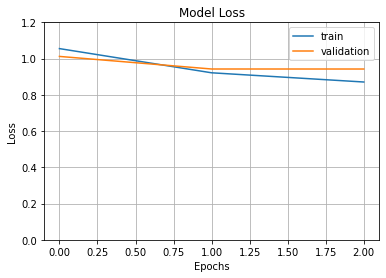

In [68]:
#train_results
fig1 = plt.gcf()
plt.plot(train_results.history['loss'])
plt.plot(train_results.history['val_loss'])
plt.axis(ymin=0,ymax=1.2)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [69]:
from sklearn.metrics import classification_report

#y_pred = vit_classifier.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred[0],axis=1)

#print(classification_report(prepared_test[0:]['label'], y_pred))
#print(classification_report(Y, y_pred))

In [70]:
processed_dataset["test"]

Dataset({
    features: ['img', 'labels', 'pixel_values'],
    num_rows: 516
})

In [71]:
#print(processed_dataset["test"][0:])
y_pred_bool

array([0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 0, 2, 0, 2, 0, 0, 2, 1, 1, 0,
       1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0,
       1, 2, 2, 2, 2, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 2,
       2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 1, 2, 0, 0, 2, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1,
       0, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2,
       0, 0, 2, 1, 0, 0, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 2, 0, 1, 2, 2,
       1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0,

In [40]:
print(classification_report(processed_dataset["test"]['labels'], y_pred_bool))
#y_test=processed_dataset["test"][0:]['labels']

              precision    recall  f1-score   support

           0       0.35      0.48      0.40       185
           2       0.32      0.29      0.30       189
           3       0.30      0.19      0.23       142

    accuracy                           0.33       516
   macro avg       0.32      0.32      0.31       516
weighted avg       0.32      0.33      0.32       516



In [72]:
print(classification_report(processed_dataset["test"]['labels'], y_pred_bool))
#y_test=processed_dataset["test"][0:]['labels']

              precision    recall  f1-score   support

           0       0.31      0.44      0.36       167
           1       0.35      0.34      0.34       174
           2       0.28      0.17      0.21       175

    accuracy                           0.31       516
   macro avg       0.31      0.32      0.30       516
weighted avg       0.31      0.31      0.30       516

